In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT = os.path.join("/home", "niche", "cowsformer")
DIR_OUT = os.path.join(ROOT, "out", "yolov8")
RUNS = ["run_%d" % i for i in range(8)]

In [3]:
data = pd.read_csv(os.path.join(DIR_OUT, RUNS[0], "results.csv"))
for i in range(1, len(RUNS)):
    data_new = pd.read_csv(os.path.join(DIR_OUT, RUNS[i], "results.csv"))
    data = pd.concat([data, data_new])
data.to_csv(os.path.join(DIR_OUT, "results.csv"), index=False)

In [4]:
print(data)
p = 5 * 3 * 5 # n size x models x datasets
print("number of iterations: %.2f" % (len(data) / p))

     map5095   map50  precision  recall      f1  n_all  n_fn  n_fp  \
0     0.1134  0.2580     0.5766  0.2271  0.3258    709   635     5   
1     0.1090  0.2365     0.5080  0.2214  0.3084    709   512   336   
2     0.1209  0.2427     0.5132  0.2186  0.3066    709   545   109   
3     0.1445  0.2896     0.4784  0.2595  0.3365    709   499   235   
4     0.1472  0.2913     0.5140  0.2694  0.3535    709   486   272   
..       ...     ...        ...     ...     ...    ...   ...   ...   
562   0.3100  0.5535     0.7561  0.4903  0.5948    721   374    85   
563   0.3420  0.5682     0.6950  0.5153  0.5918    522   187   559   
564   0.4153  0.6995     0.8307  0.6322  0.7180    522   162   115   
565   0.5007  0.7919     0.9264  0.6820  0.7856    522   135    79   
566   0.5627  0.8656     0.8840  0.7720  0.8242    522   103    65   

           config    model    n  
0    1a_angle_t2s  yolov8n   16  
1    1a_angle_t2s  yolov8n   32  
2    1a_angle_t2s  yolov8n   64  
3    1a_angle_t2s  yolo

In [5]:
data.query("config=='1a_angle_t2s' and n==16 and model == 'yolov8m'")

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
29,0.1129,0.2354,0.4967,0.2426,0.3260,709,526,171,1a_angle_t2s,yolov8m,16
116,0.0677,0.1828,0.3592,0.2059,0.2618,709,473,800,1a_angle_t2s,yolov8m,16
203,0.0997,0.2174,0.3866,0.2426,0.2981,709,491,470,1a_angle_t2s,yolov8m,16
290,0.1256,0.2733,0.4959,0.2609,0.3419,709,481,341,1a_angle_t2s,yolov8m,16
377,0.0980,0.2214,0.3967,0.2200,0.2831,709,514,432,1a_angle_t2s,yolov8m,16
464,0.1236,0.2594,0.6072,0.2398,0.3438,709,495,483,1a_angle_t2s,yolov8m,16
551,0.0875,0.2034,0.3528,0.2468,0.2905,709,502,459,1a_angle_t2s,yolov8m,16
638,0.0722,0.1583,0.3436,0.1890,0.2439,709,558,280,1a_angle_t2s,yolov8m,16
29,0.1362,0.2761,0.3857,0.2891,0.3305,709,464,422,1a_angle_t2s,yolov8m,16
116,0.0521,0.1325,0.2480,0.2130,0.2292,709,485,1386,1a_angle_t2s,yolov8m,16


<AxesSubplot: xlabel='n', ylabel='map50'>

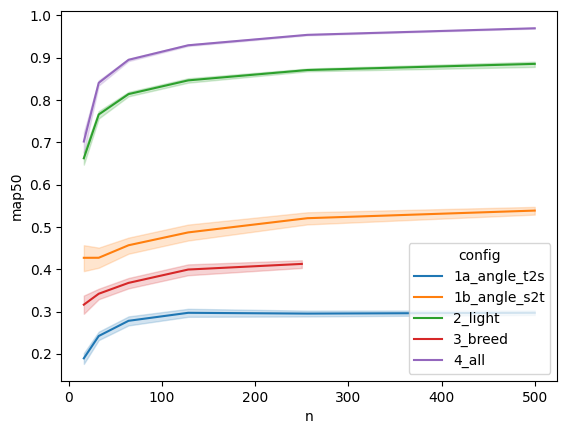

In [6]:
sns.lineplot(data=data.query("model == 'yolov8n'"), x="n", y="map50", hue="config",)

In [7]:
data_long = data.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolov8n,1a_angle_t2s,16,map5095,0.1134
1,yolov8n,1a_angle_t2s,32,map5095,0.1090
2,yolov8n,1a_angle_t2s,64,map5095,0.1209
3,yolov8n,1a_angle_t2s,128,map5095,0.1445
4,yolov8n,1a_angle_t2s,256,map5095,0.1472
...,...,...,...,...,...
39019,yolov8x,1b_angle_s2t,500,n_fp,85.0000
39020,yolov8x,2_light,16,n_fp,559.0000
39021,yolov8x,2_light,32,n_fp,115.0000
39022,yolov8x,2_light,64,n_fp,79.0000


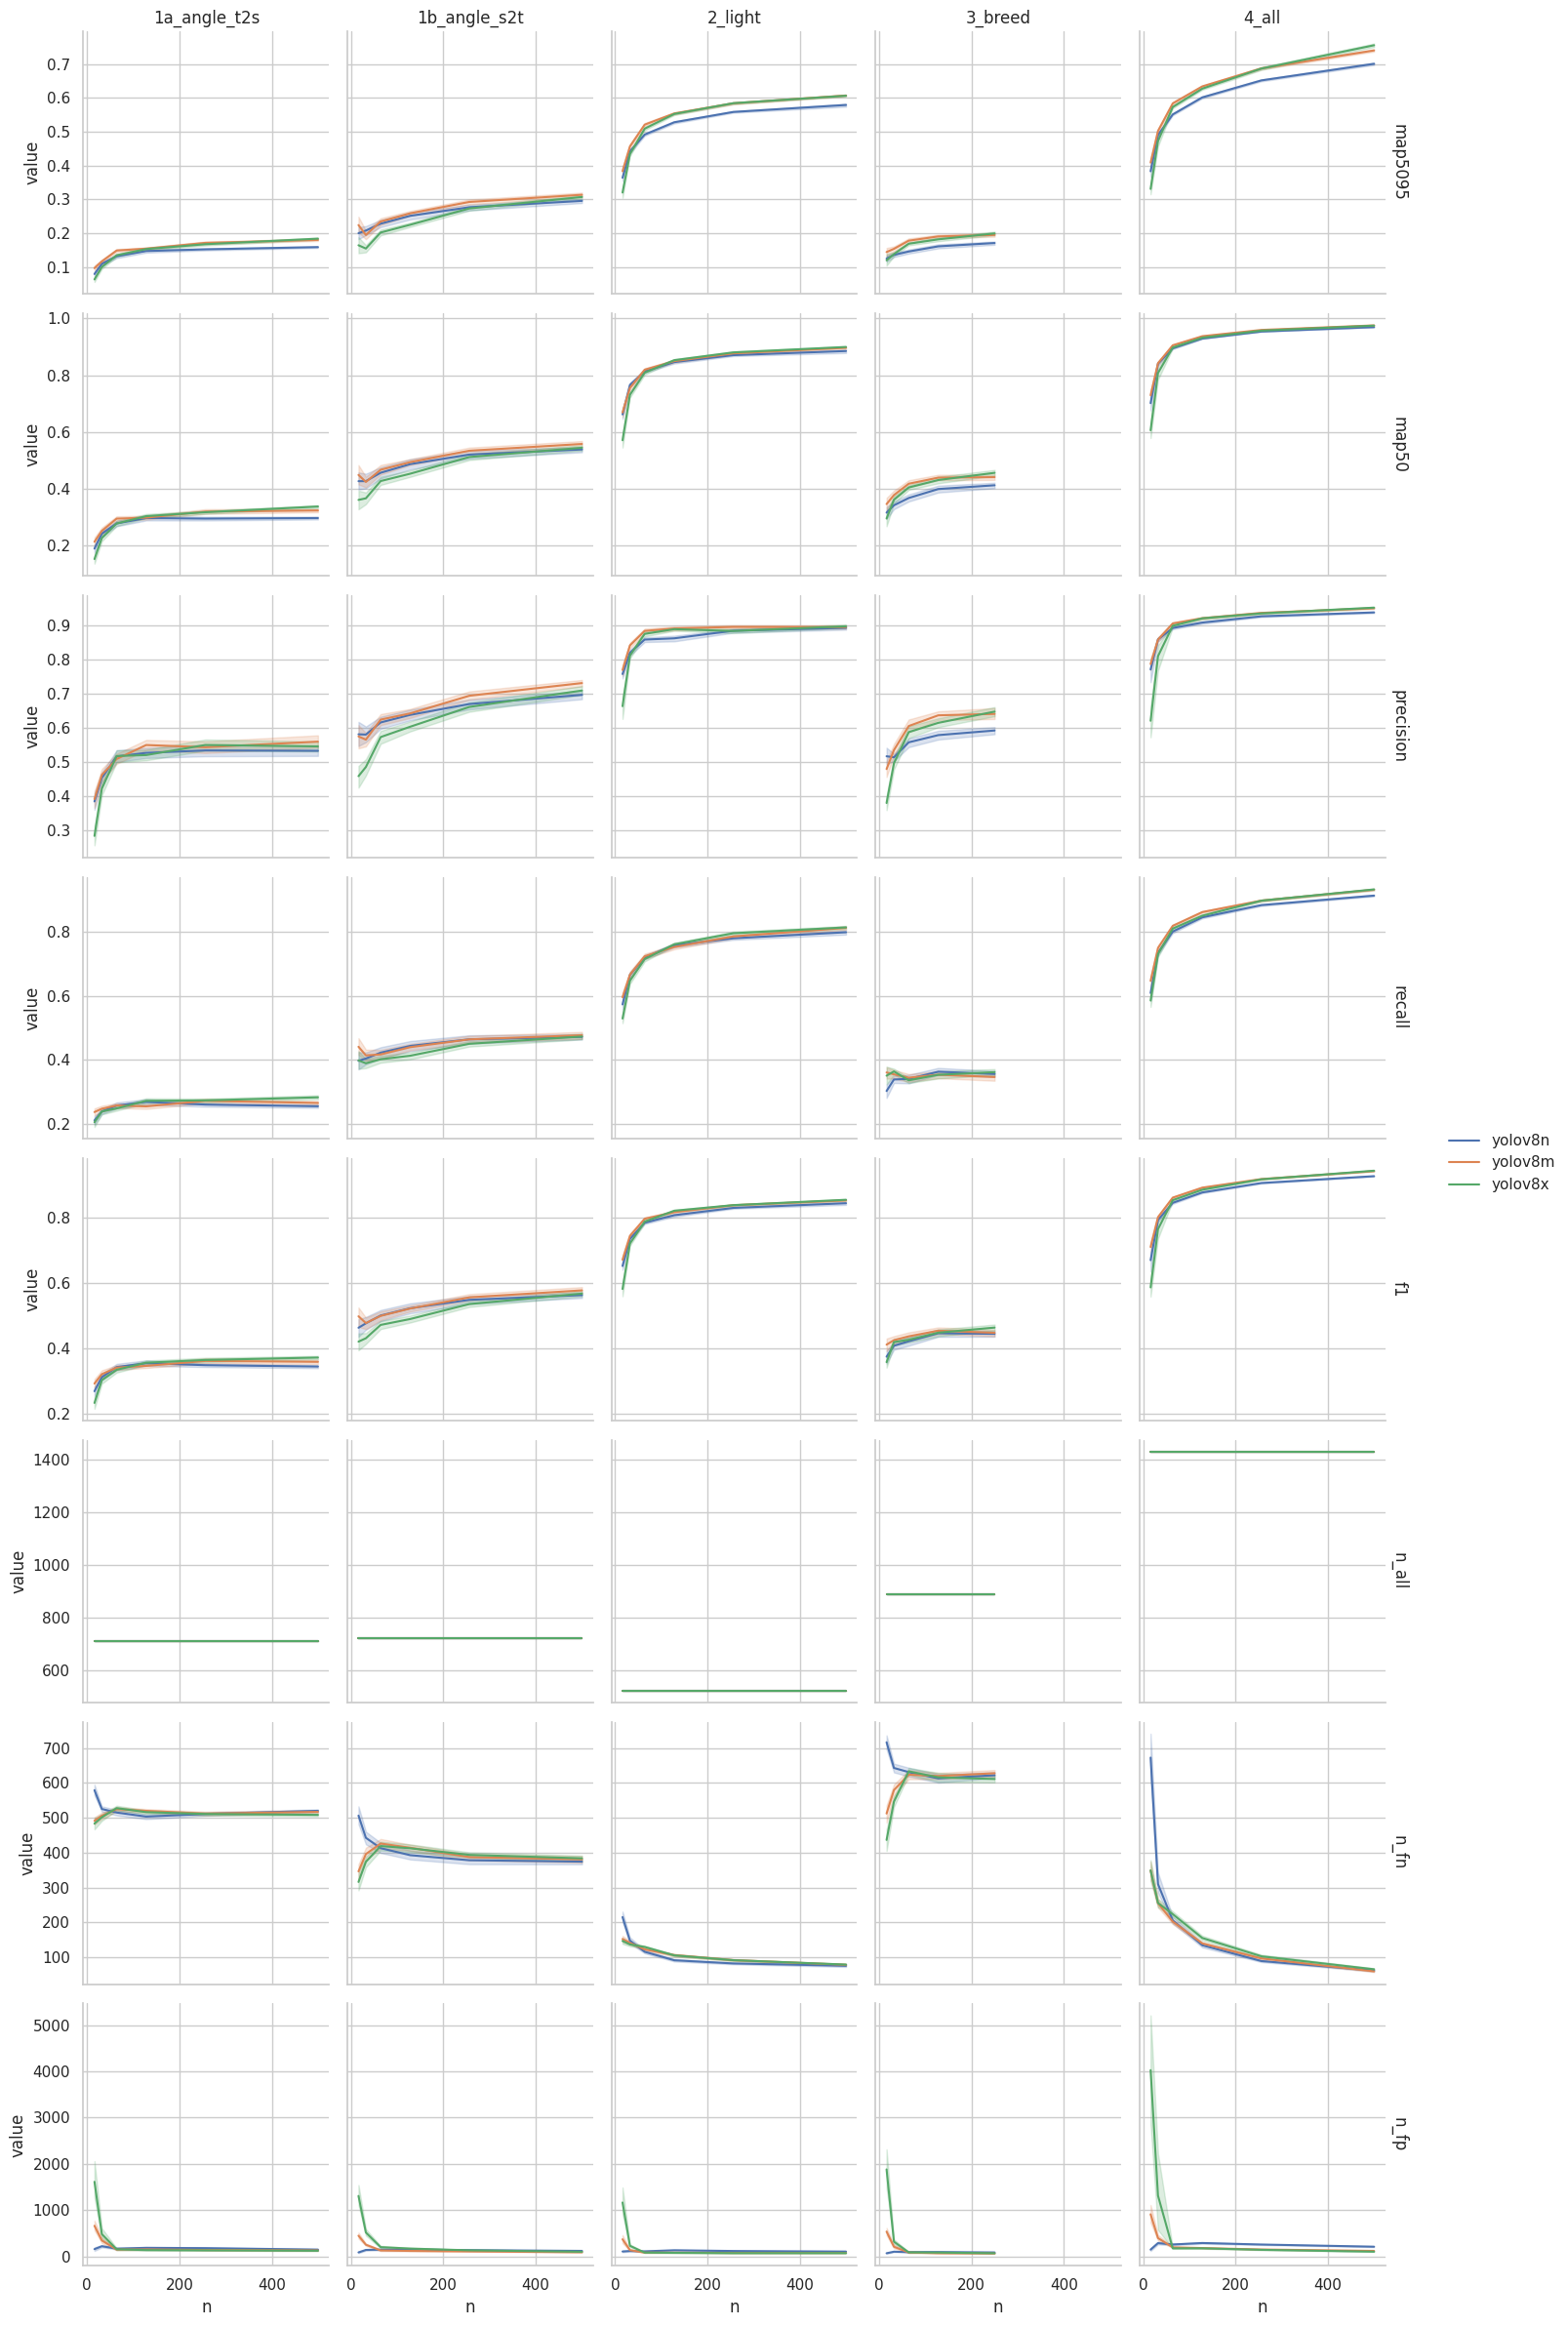

In [8]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()